In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [73]:
# create random weights of n x d
def create_random_weights(n, d):
    return np.random.rand(n, d)

weights = create_random_weights(100, 10) # will be replaced by actual test weights
weights.shape

(100, 10)

In [74]:
# create training data
def create_training_data(n, d):
    X = np.random.rand(n, d)
    y = np.random.rand(n)
    return X, y

data = create_training_data(100, 10) # will be replaced by actual training
data[0].shape, data[1].shape

((100, 10), (100,))

In [75]:
# create a function to calculate the loss
def calculate_loss(weights, X, y):
    predictions = np.dot(X, weights.T)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    return loss


In [76]:
# test the calculate_loss function
loss = calculate_loss(weights, data[0], data[1])
print(f"Calculated Loss: {loss}")

Calculated Loss: 4.35904716090087


In [77]:
# create a function to plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(losses)), y=losses)
    plt.title('Loss Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [78]:
# create a forward pass function
def forward_pass(X, weights):
    return np.dot(X, weights.T)

In [79]:
# create a backward pass function using newtons method
def backward_pass(X, y, weights):
    predictions = forward_pass(X, weights)
    errors = predictions - y.reshape(-1, 1)
    gradients = np.dot(errors.T, X) / len(y)
    return gradients


In [80]:
# create a function to update weights
def update_weights(weights, gradients, learning_rate=0.01):
    return weights - learning_rate * gradients

In [81]:
# create a function to train the model
def train_model(X, y, weights, iterations=100, learning_rate=0.01):
    losses = []
    for i in range(iterations):
        gradients = backward_pass(X, y, weights)
        weights = update_weights(weights, gradients, learning_rate)
        loss = calculate_loss(weights, X, y)
        losses.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")
    return weights, losses

Iteration 0, Loss: 4.1584442119721725
Iteration 10, Loss: 2.6107668518193945
Iteration 20, Loss: 1.6620917051205568
Iteration 30, Loss: 1.0804151784999236
Iteration 40, Loss: 0.7235957172976306
Iteration 50, Loss: 0.5045474451824886
Iteration 60, Loss: 0.36991539022755726
Iteration 70, Loss: 0.28701045946871456
Iteration 80, Loss: 0.23580490431867812
Iteration 90, Loss: 0.20402819124839666


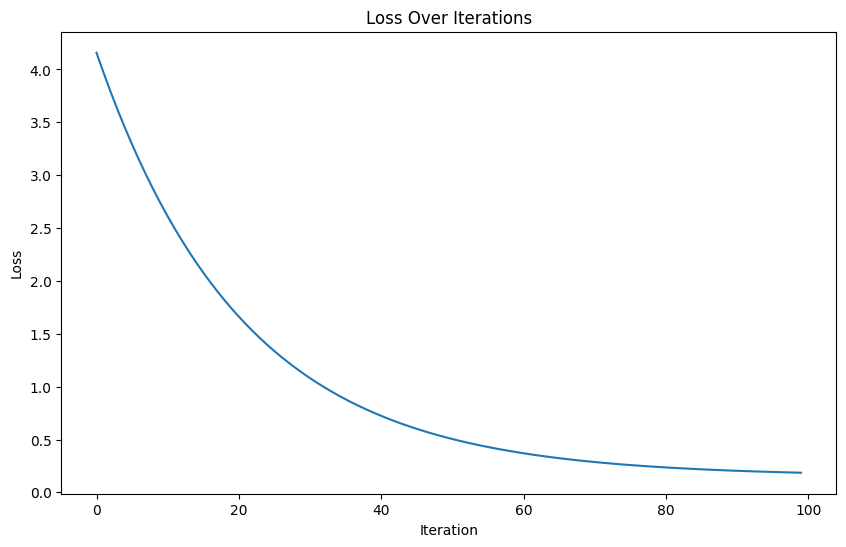

In [82]:
# train the model
trained_weights, losses = train_model(data[0], data[1], weights, iterations=100, learning_rate=0.01)
# plot the loss
plot_loss(losses)
# create a function to evaluate the model
def evaluate_model(X, y, weights):
    predictions = forward_pass(X, weights.T)
    loss = calculate_loss(weights.T, X, y)
    loss = np.mean(loss)
    print(f"Evaluation Loss: {loss}")
    return predictions

In [83]:
# print the weights
print("Trained Weights:")
print(trained_weights)

Trained Weights:
[[-5.20020312e-02  3.09987001e-01  2.76668374e-01  5.85620400e-01
   7.20956922e-02  4.02992061e-01  2.62171117e-01 -2.60043620e-01
  -2.53558030e-01 -8.96015853e-02]
 [ 5.66779355e-02 -7.01977154e-02 -7.20814982e-02  1.98954909e-01
   2.24682480e-01  4.36764400e-02  5.21203163e-01  4.33922264e-01
  -1.43492269e-01  5.26923661e-02]
 [-2.54501426e-01  2.65462604e-01  1.36596646e-01  7.25519353e-02
  -2.30980198e-01  2.52708805e-01  2.19588402e-02 -9.40159838e-02
   6.51544850e-01  4.50294431e-01]
 [ 4.70657310e-01  4.78106190e-03  1.35514987e-01  4.36819610e-01
  -3.21370946e-01 -2.34592329e-01  4.68921456e-01 -4.37539009e-02
   5.20536988e-01 -1.31899114e-01]
 [ 2.35532805e-01  1.09873131e-01  4.51117925e-01  6.64440350e-03
   1.30483953e-01  9.29440424e-02  5.53819088e-02  2.86854001e-01
  -1.17543774e-01  5.68747549e-03]
 [ 3.85982487e-01  1.91875579e-01 -1.10641007e-01  3.19286807e-01
  -2.09911650e-01  1.82210174e-01 -1.44992443e-01  3.97421173e-01
   4.18039335e-0

In [84]:
# wrap the training inside a function
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    n_samples, n_features = X.shape
    # weights = np.zeros((n_features, 1))
    weights = np.random.rand(n_features, 1)  # Initialize weights randomly
    losses = []

    for i in range(100):  # number of iterations
        # predictions = forward_pass(X, weights)
        predictions = np.dot(X, weights)
        errors = predictions - Y.reshape(-1, 1)
        gradients = (2 / n_samples) * np.dot(X.T, errors) + lambda_ * weights
        weights -= lr * gradients
        # loss = calculate_loss(weights, X, Y)
        loss = np.mean(errors ** 2) + lambda_ * np.sum(weights ** 2)
        losses.append(loss)

        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return weights, losses

Iteration 0, Loss: 4.24075514624738
Iteration 10, Loss: 1.7294814138972474
Iteration 20, Loss: 0.8082454313656249
Iteration 30, Loss: 0.4659314034090417
Iteration 40, Loss: 0.33490925809296224
Iteration 50, Loss: 0.281378126191325
Iteration 60, Loss: 0.2565555658616816
Iteration 70, Loss: 0.24260135432772112
Iteration 80, Loss: 0.2329549763465619
Iteration 90, Loss: 0.22517906818843467


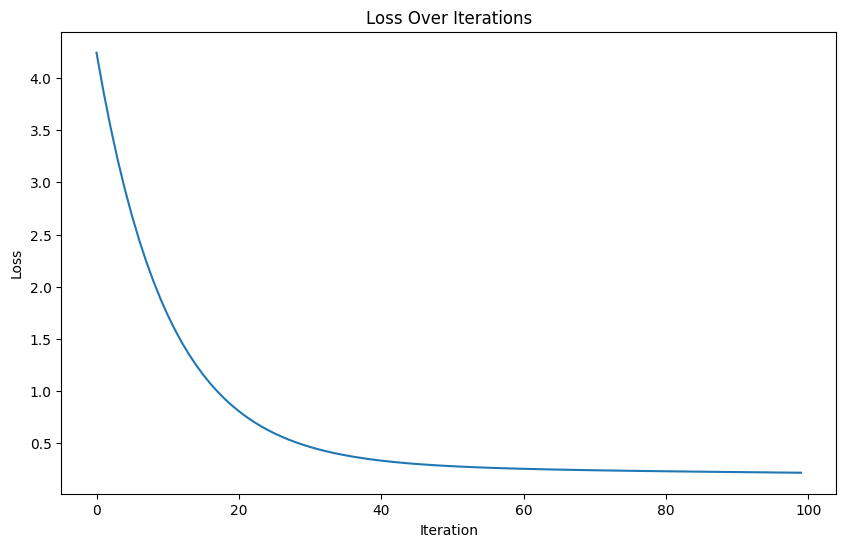

Evaluation Loss: 0.16130896884567314
Predictions:
[[1.18569563]
 [0.45981407]
 [0.33443801]
 [0.58450462]
 [0.18189028]
 [0.65973212]
 [0.23199983]
 [0.48754936]
 [0.08220773]
 [0.24480444]
 [0.4425366 ]
 [0.82973827]
 [0.20726199]
 [0.23843507]
 [0.37079893]
 [0.2936383 ]
 [0.54933052]
 [0.78951258]
 [0.47752885]
 [0.29088444]
 [0.59243464]
 [0.63434344]
 [0.54302002]
 [0.793748  ]
 [0.41479186]
 [0.235656  ]
 [0.63131635]
 [0.54271544]
 [0.63149624]
 [0.51101208]
 [0.16691148]
 [0.63517329]
 [0.38034617]
 [0.32079265]
 [0.67502368]
 [0.71229917]
 [0.47147172]
 [0.39993689]
 [0.76212216]
 [0.52511823]
 [0.43798687]
 [0.54604342]
 [0.23078765]
 [0.39618837]
 [0.55415796]
 [0.51802731]
 [0.29652193]
 [0.37579905]
 [0.38632607]
 [0.10034733]
 [0.4109474 ]
 [0.55303707]
 [0.68812477]
 [0.38919632]
 [0.9468838 ]
 [0.83153575]
 [0.57263192]
 [0.24499758]
 [0.0413622 ]
 [0.48431235]
 [0.60820272]
 [0.80713333]
 [0.58006176]
 [0.21114762]
 [0.80541682]
 [0.30844521]
 [0.58035911]
 [0.56919873

In [85]:
# test the linearRegression function
lr = 0.01
lambda_ = 0.1
trained_weights, losses = linearRegression(data[0], data[1], lr, lambda_)
# plot the loss for linear regression
plot_loss(losses)
# evaluate the model
predictions = evaluate_model(data[0], data[1], trained_weights)
# print the predictions
print("Predictions:")
print(predictions)